# 次元削除
- FastICA

In [1]:
import numpy as np
import pandas as pd
import japanize_matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import FastICA

In [13]:
# 分類されたクラスタを表示
def show_cluster(ica, suptitle, title, n_row=3, n_col=3):
    center = ica.components_.copy()
    plt.figure(figsize=(15, 10))
    plt.suptitle(suptitle, fontsize=20)
    for i in np.arange(len(center)):
        ax = plt.subplot(n_row, n_col, i+1)
        ax.set_title(f'{title}:{i+1}', fontsize=15)
        ax.plot(center[i])
    plt.tight_layout()
    plt.show()

In [3]:
# -1〜+1の間に規格化
def normalize(score):
    norm = (score-score.min())/(score.max()-score.min()) # 0-1に規格化
    norm = norm * 2
    norm = norm - np.mean(norm, axis=0)
    return norm

In [4]:
# 位相整列の実装(指導教員から提供された関数)
def alignment(x):
    fft = np.fft.fft(x)
    fft_phase = np.angle(fft)
    fft_abs = np.abs(fft)[:-1] # -1はあったほうが良さそう。
    disp = fft_phase[np.argmax(fft_abs)] * len(x) / (2 * np.pi)
    disp = int(- disp) % len(x)
    return np.tile(x, 2)[disp:disp+len(x)]

In [5]:
# 使うデータは1036冊分の小説データの感情スコア値
SCORE_PATH = 'data/all_score_0630.csv'

In [6]:
# pandas dataframeとして読み込む
score_df = pd.read_csv(SCORE_PATH, index_col=0)
score_df.head()

,S00,S01,S02,S03,S04,S05,S06,S07,S08,S09,...,S90,S91,S92,S93,S94,S95,S96,S97,S98,S99
13,0.791536,0.737968,0.829343,0.794293,0.724665,0.707668,0.620669,0.607199,0.584499,0.626389,...,0.754139,0.782878,0.784226,0.576965,0.534152,0.601299,0.612696,0.611167,0.664706,0.736535
24,0.749562,0.727724,0.721075,0.648729,0.764811,0.627247,0.634754,0.640822,0.792777,0.844474,...,0.690379,0.640809,0.828280,0.806064,0.754045,0.906671,0.896347,0.869153,0.901117,0.933473
30,0.473785,0.473785,0.652944,0.622040,0.663769,0.799352,0.982744,0.966812,0.851591,0.907304,...,0.101549,0.142406,0.285570,0.270750,0.320434,0.441094,0.464494,0.548101,0.610829,0.517892
41,0.900899,0.952689,1.000000,0.928408,0.802310,0.760143,0.699925,0.759109,0.660739,0.726829,...,0.094422,0.246499,0.291265,0.373439,0.445357,0.450839,0.390509,0.337263,0.402609,0.459209
47,0.742317,0.836033,0.890097,0.911625,0.967501,0.967501,0.972570,0.982321,1.000000,0.929571,...,0.202141,0.256933,0.256933,0.243298,0.175068,0.204548,0.171354,0.173879,0.108680,0.023454


In [7]:
scores = score_df.to_numpy()

In [8]:
# 平均値を０にしておく(-1〜1の間に規格化)
A = normalize(scores)
A.shape, np.min(A), np.max(A), np.mean(A)

((1036, 100), -1.1071332471188664, 1.0698986010803475, -4.020807710804621e-18)

## FastICA

In [19]:
ica = FastICA(n_components=9, random_state=0, whiten='unit-variance')
transformed = ica.fit_transform(A)
transformed.shape

(1036, 9)

### アライメント前

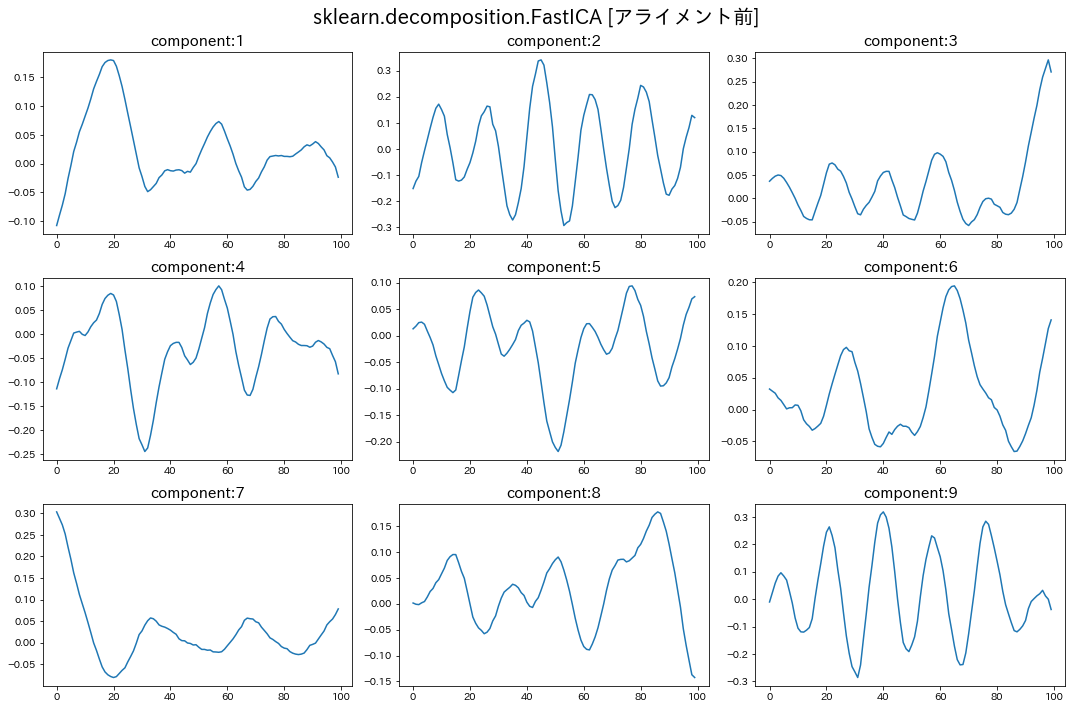

In [20]:
suptitle = 'sklearn.decomposition.FastICA [アライメント前]'
show_cluster(ica, suptitle, 'component')

### アライメント後

In [16]:
# アライメント実行
A_alignment = []
for a in A:
    A_alignment.append(alignment(a))
A_alignment = np.array(A_alignment)

In [18]:
ica2 = FastICA(n_components=9, random_state=0, whiten='unit-variance')
transformed2 = ica2.fit_transform(A_alignment)
transformed2.shape

(1036, 9)

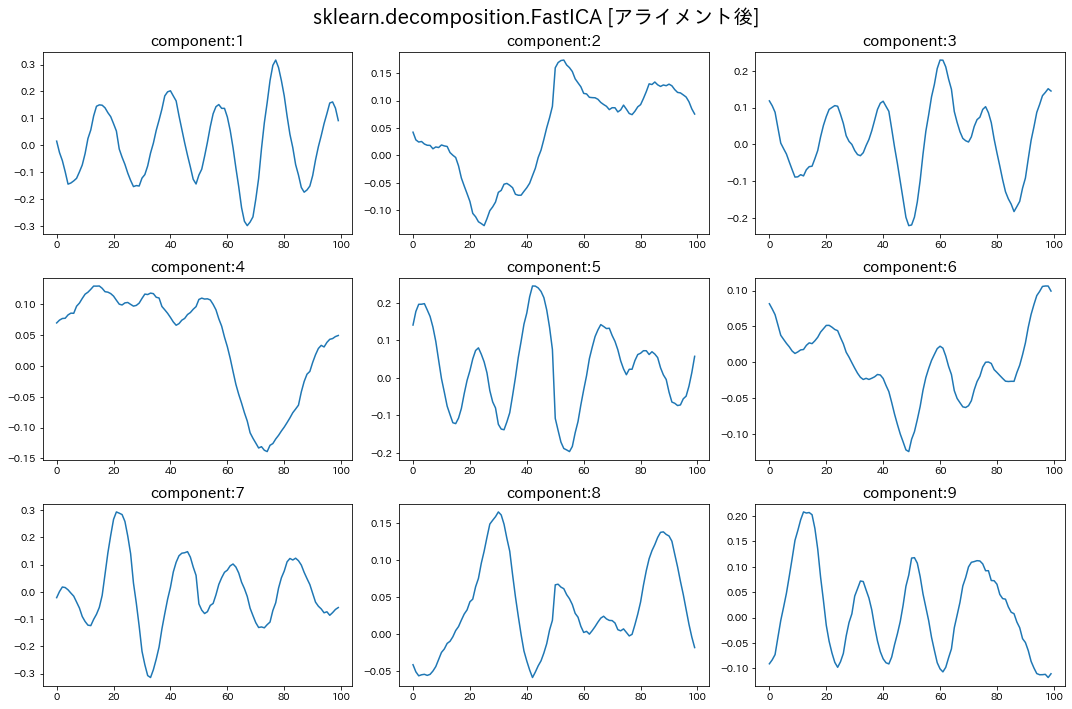

In [21]:
suptitle = 'sklearn.decomposition.FastICA [アライメント後]'
show_cluster(ica2, suptitle, 'component')